In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train.csv')
train_labels = pd.read_csv('train_labels.csv')
test = pd.read_csv('test.csv')
specs = pd.read_csv('specs.csv')
ss = pd.read_csv('sample_submission.csv')

In [3]:
train_ = train.sample(1000000)

The outcomes in this competition are grouped into 4 groups(accuracy_group)

    3: the assessment was solved on the first attempt
    2: the assessment was solved on the second attempt
    1: the assessment was solved after 3 or more attempts
    0: the assessment was never solved


In [4]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


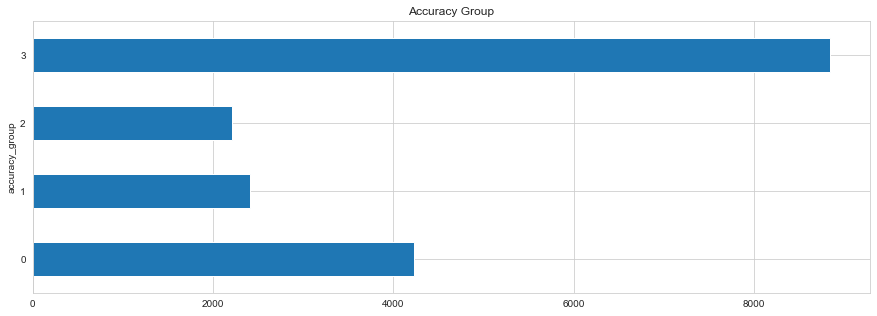

In [12]:
a = train_labels.groupby('accuracy_group')['game_session'].count()
a.plot(kind='barh', figsize=(15,5), title='Accuracy Group')
plt.show()

D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Ricky\envs\Python 38 and R\lib\site-packages\seaborn\distribut

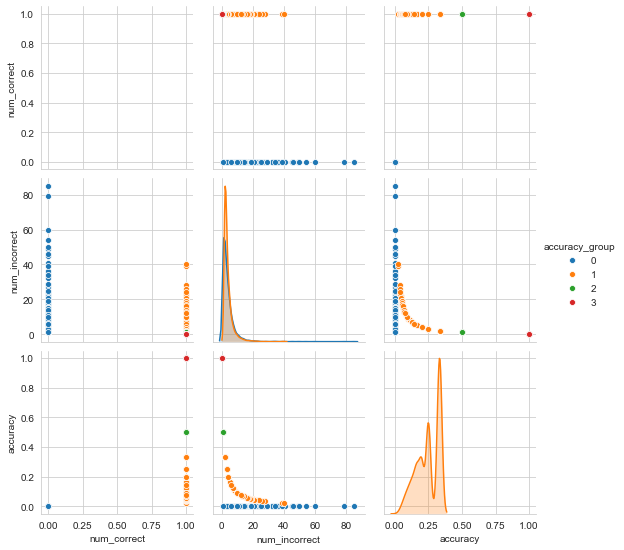

In [5]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   event_id         object
 1   game_session     object
 2   timestamp        object
 3   event_data       object
 4   installation_id  object
 5   event_count      int64 
 6   event_code       int64 
 7   game_time        int64 
 8   title            object
 9   type             object
 10  world            object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [13]:
# datetime library to convert object type to datetime type. Then, convert datetime type to hour,date,weekday 
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.day_name()

print(f'Train data shape: {train.shape}')

Train data shape: (11341042, 14)


In [18]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday


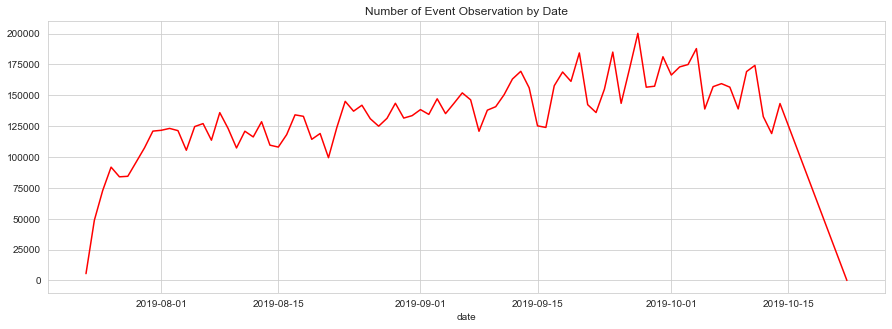

In [34]:
train.groupby('date')['event_id'].agg('count').plot(figsize=(15,5), title='Number of Event Observation by Date', color='r')
plt.show()

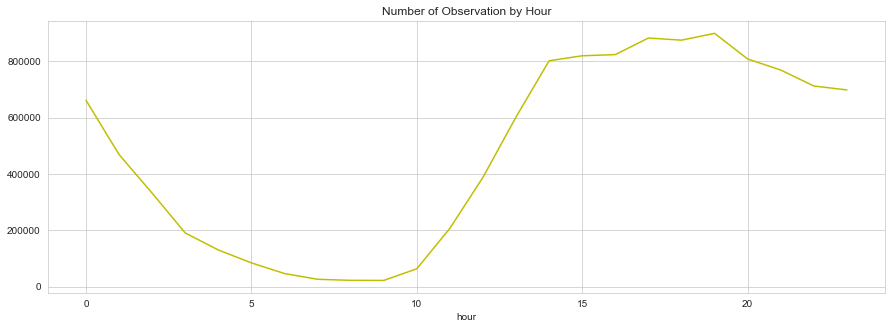

In [33]:
train.groupby('hour')['event_id'].agg('count').plot(figsize=(15,5), title='Number of Observation by Hour', color='y')

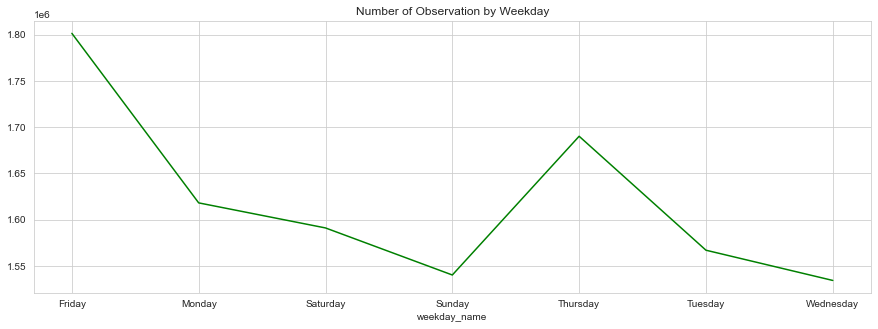

In [53]:
train.groupby('weekday_name')['event_id'].agg('count').plot(figsize=(15,5), title='Number of Observation by Weekday', color='g')
plt.show()

In [39]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,17,Friday
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday


In [43]:
print(train['event_data'][4])

{"description":"Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!","identifier":"Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape","media_type":"audio","duration":6919,"event_count":3,"game_time":6972,"event_code":3110}


In [41]:
print(train['event_data'][5])

{"coordinates":{"x":583,"y":605,"stage_width":1015,"stage_height":762},"event_count":4,"game_time":9991,"event_code":4070}


In [47]:
#Count number of different unique() values drops duplicates
train['installation_id'].nunique()

17000

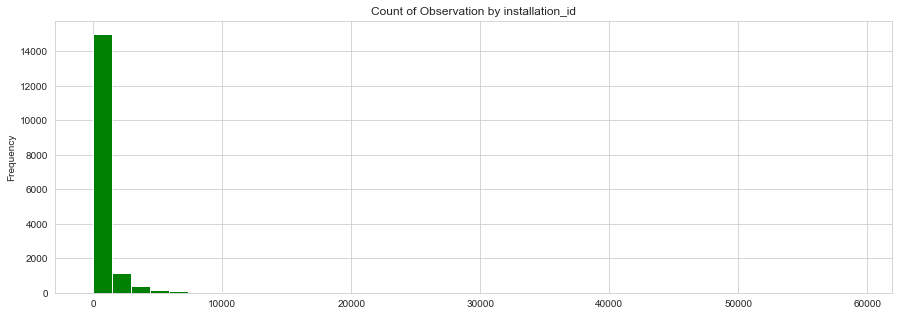

In [52]:
train.groupby('installation_id').count()['event_id'].plot(kind='hist', bins=40, figsize=(15,5), color='g', title="Count of Observation by installation_id")

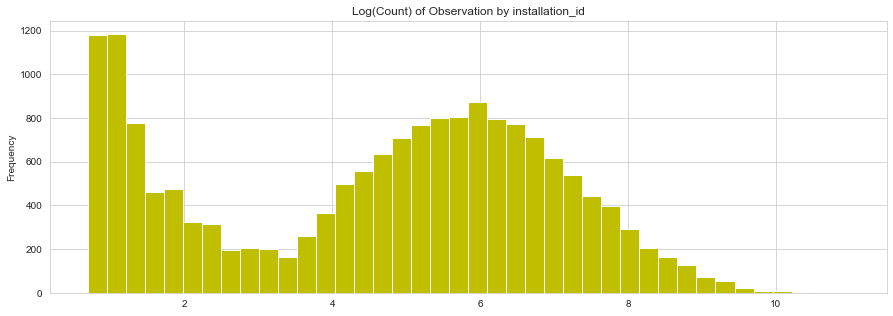

In [55]:
train.groupby('installation_id').count()['event_id'].apply(np.log1p).plot(kind='hist', bins=40, color='y', figsize=(15,5), title= 'Log(Count) of Observation by installation_id')
plt.show()

In [56]:
train.groupby('installation_id').count()['event_id'].sort_values(ascending=False).head()

installation_id
f1c21eda    58988
4d7d3d97    32749
d25338cb    31826
cff5a334    30918
c9ea32e9    30402
Name: event_id, dtype: int64

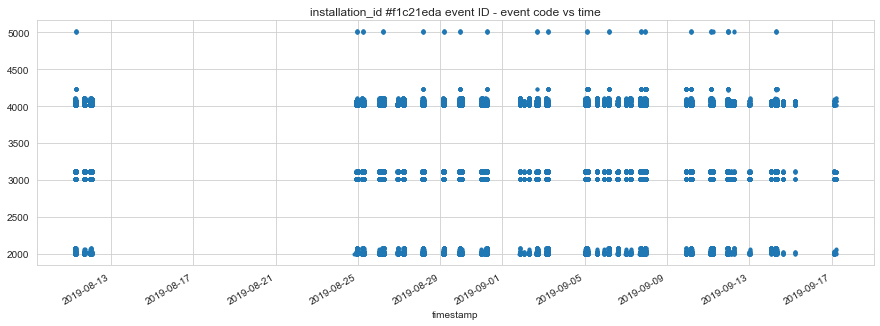

In [58]:
train.query('installation_id == "f1c21eda"').set_index('timestamp')['event_code'].plot(figsize=(15,5), style='.', title='installation_id #f1c21eda event ID - event code vs time')

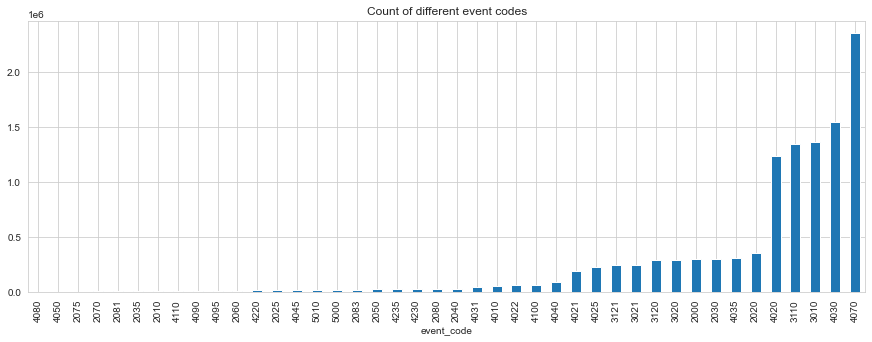

In [62]:
train.groupby('event_code').count()['event_id'].sort_values().plot(kind='bar', figsize=(15,5), title='Count of different event codes')
plt.show()

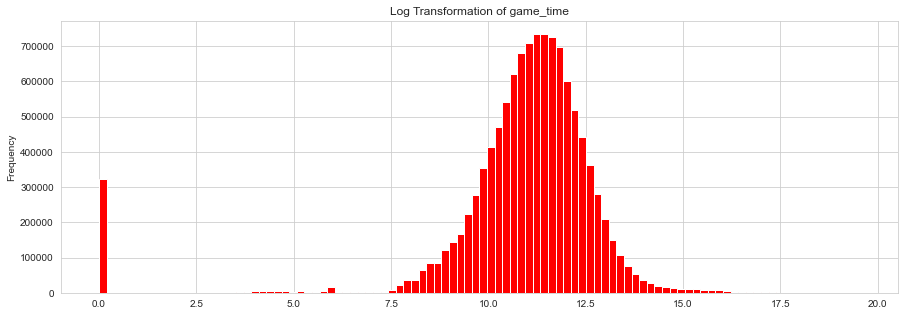

In [63]:
train['game_time'].apply(np.log1p).plot(kind='hist', figsize=(15,5), bins=100, title='Log Transformation of game_time', color='r')

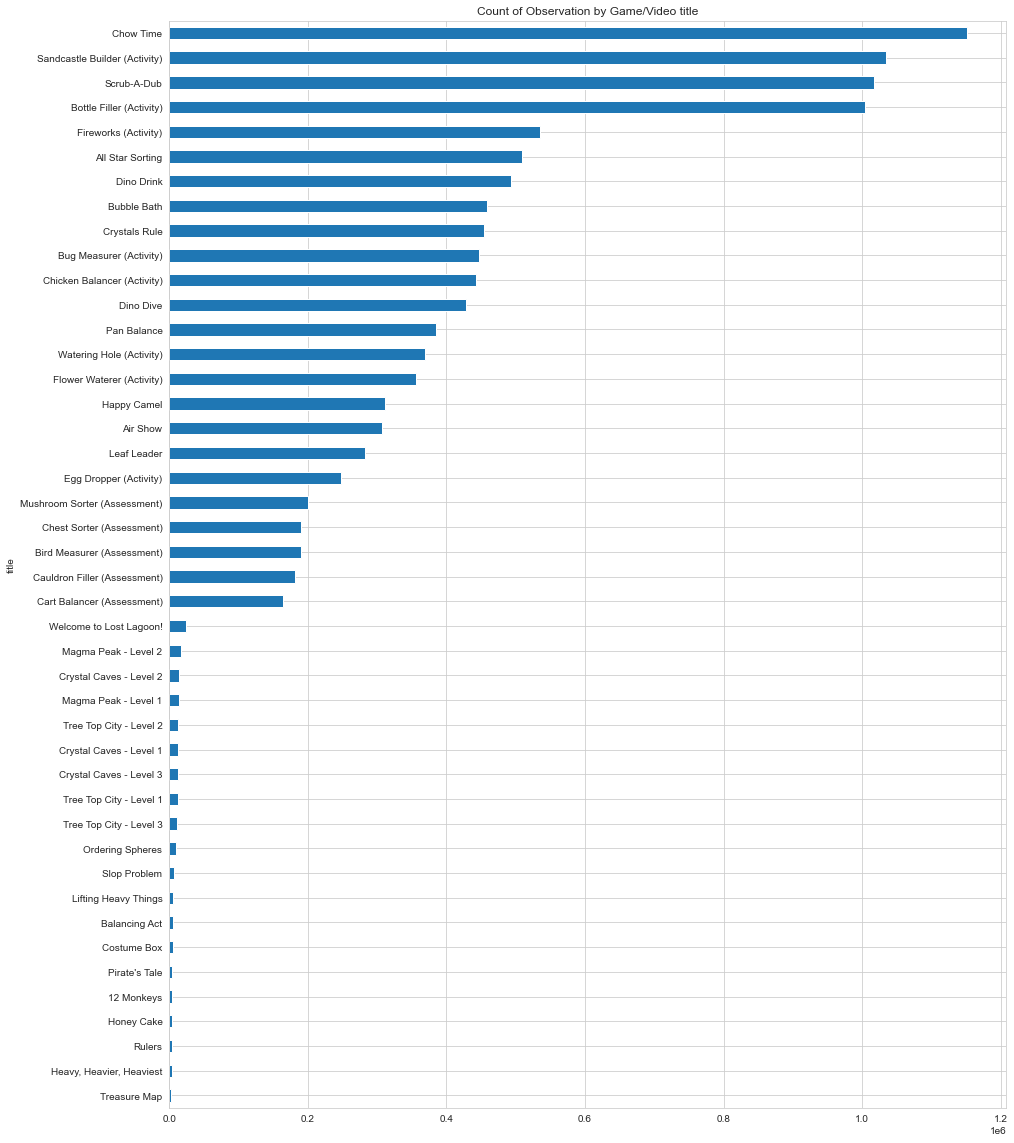

In [68]:
train.groupby('title')['event_id'].count().sort_values().plot(kind='barh', title='Count of Observation by Game/Video title', figsize=(15,20))
plt.show()